In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize, LogNorm
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.special as special
from bvp import fd, shoot
import numpy.linalg as la

[  4.91509838  19.66034509  44.23559491  78.64060577 122.87503877]


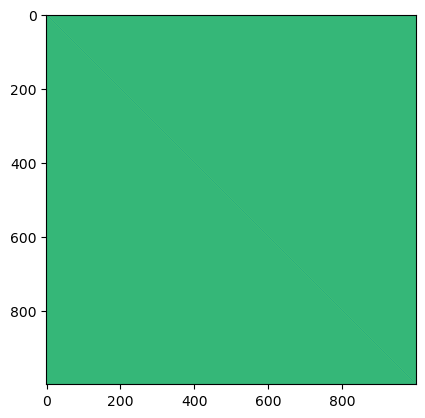

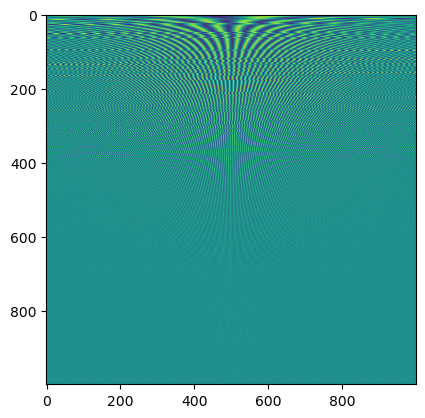

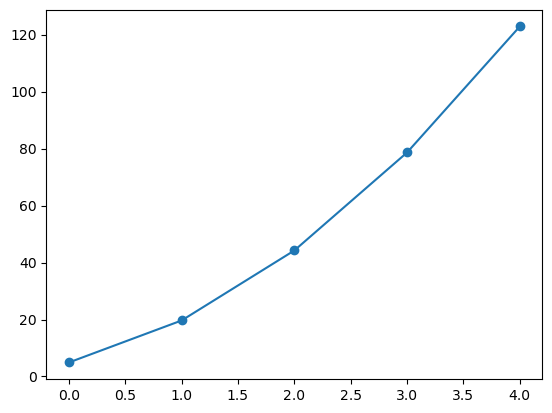

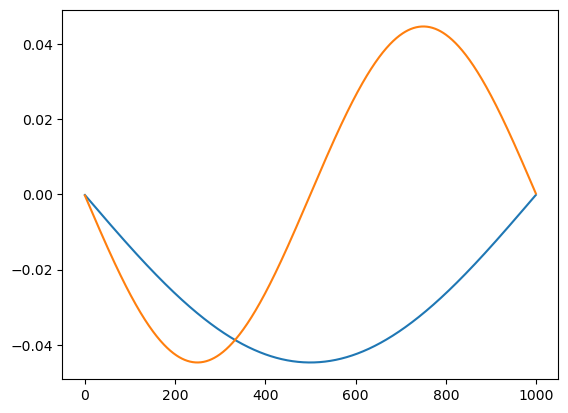

In [2]:
#neskonca jama koncne diference:
#metoda diferenc

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-l/2, l/2, 1000)
h = t[1]-t[0]
a = 1.
b = 1.
da = 0.
k = -2*m*h**2/hbar**2

t = np.linspace(-a/2, a/2, 1000)
h = t[1] - t[0]

diag = np.ones_like(t) * -2
upper_diag = [1]*(len(t)-1)
lower_diag = [1]*(len(t)-1)

H = np.diag(diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)
res = la.eigh(H)


diag = (np.ones_like(t) * -2)# /h**2
upper_diag = [1]*(len(t)-1)#/h**2
lower_diag = [1]*(len(t)-1)#/h**2

A = np.diag(diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)
# print(A)

eigval, eigvec = la.eigh(A)
eigval = eigval / k
sort_ind = np.argsort((eigval))
eigval, eigvec = eigval[sort_ind], eigvec.T[sort_ind]


plt.figure()
plt.imshow(A)
plt.figure()
plt.imshow(eigvec)
print(eigval[:5])
plt.figure()
plt.plot(np.arange(5), eigval[:5],marker='o')
plt.figure()

plt.plot(eigvec[0])
plt.plot(eigvec[1])

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/3362814269.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('pink')


10
50
100
1000
5000
10000


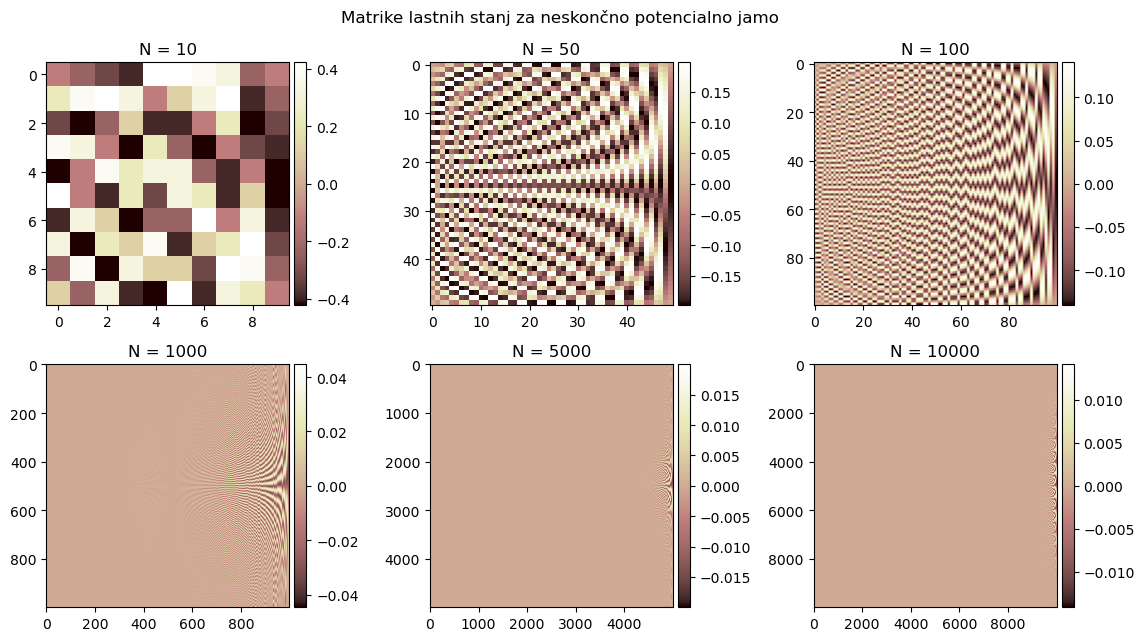

In [106]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


fig, axs = plt.subplots(2, 3, figsize=(12, 6.5))
fig.suptitle('Matrike lastnih stanj za neskončno potencialno jamo')
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

a = 1.


ns = [10,50,100,1000,5000,10000]
all_data = []
cmap = cm.get_cmap('pink')
for i, pos in enumerate([(0,0),(0,1),(0,2),(1,0), (1,1), (1,2)]):
    divider = make_axes_locatable(axs[pos])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    t = np.linspace(-a/2, a/2, ns[i])
    h = t[1] - t[0]
    A = np.ones((len(t)))
    diag = np.ones_like(t) * -2
    upper_diag = [1]*(len(t)-1)
    lower_diag = [1]*(len(t)-1)

    H = np.diag(diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)
    res = la.eigh(H)


    # all_data = np.load("all_data_1.npy",allow_pickle=True)
    # res = all_data[i]


    data = res[1]

    im = axs[pos].imshow(data, cmap=cmap)
    # im = axs[pos].imshow(data, cmap=cmap, norm=LogNorm(vmin=10**(-10), clip=bool))
    axs[pos].set_title(r'N = ' + f'{ns[i]}')

    fig.colorbar(im, cax=cax, orientation='vertical')
    all_data.append([res,t,h])
    print(ns[i])

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.savefig("matrike_lastnih_stanj")
plt.show()
# np.save("all_data_1.npy", all_data)

In [107]:
np.save("all_data_1.npy", all_data)

/Users/lukapuslar/miniconda3/envs/torch_m1/lib/python3.9/site-packages/numpy/lib/npyio.py:521: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


In [108]:
#anal
n = 1.
m = 1.
hbar = 1.
l = 1.

Ea = hbar**2 * np.pi**2 * n**2 / (2*m*l**2)
print(Ea)
n=2.
Ea = hbar**2 * np.pi**2 * n**2 / (2*m*l**2)
print(Ea)

4.934802200544679
19.739208802178716


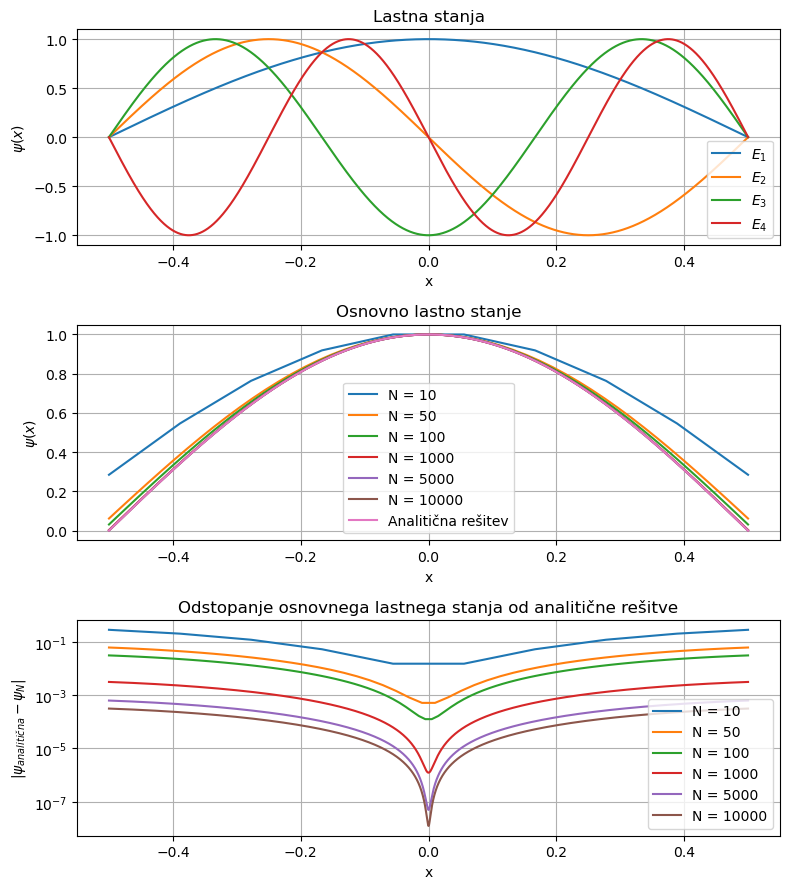

In [109]:
fig, axs = plt.subplots(3, 1, figsize=(8, 9))
all_data = np.load("all_data_1.npy", allow_pickle=True)
ns = [10,50,100,1000,5000,10000]
for i,data in enumerate(all_data[::-1]):
    h = data[2]
    t = data[1]
    k = -hbar**2 /(2*m*h**2) 
    eigval = data[0][0] * k 
    eigvec = data[0][1]
    sort_ind = np.argsort(eigval)
    eigval,eigvec = eigval[sort_ind], eigvec[sort_ind]
    axs[0].plot(t,-eigvec.T[-1]/np.max(np.abs(eigvec.T[-1])), label=r'$E_1$')
    axs[0].plot(t,eigvec.T[-2]/np.max(np.abs(eigvec.T[-2])), label=r'$E_2$')
    axs[0].plot(t,eigvec.T[-3]/np.max(np.abs(eigvec.T[-3])), label=r'$E_3$')
    axs[0].plot(t,eigvec.T[-4]/np.max(np.abs(eigvec.T[-4])), label=r'$E_4$')
    break

for i,data in enumerate(all_data):
    h = data[2]
    t = data[1]
    k = -hbar**2 /(2*m*h**2) 
    eigval = data[0][0] * k 
    eigvec = data[0][1]
    sort_ind = np.argsort(eigval)
    eigval,eigvec = eigval[sort_ind], eigvec[sort_ind]
    axs[1].plot(t,-eigvec.T[-1]/np.max(np.abs(eigvec.T[-1])), label=f'N = {ns[i]}')
axs[1].plot(t,np.cos(np.pi*t / a),label='Analitična rešitev')
    
for i,data in enumerate(all_data):
    h = data[2]
    t = data[1]
    k = -hbar**2 /(2*m*h**2) 
    eigval = data[0][0] * k 
    eigvec = data[0][1]
    sort_ind = np.argsort(eigval)
    eigval,eigvec = eigval[sort_ind], eigvec[sort_ind]
    axs[2].plot(t,np.abs(np.cos(np.pi*t / a)+eigvec.T[-1]/np.max(np.abs(eigvec.T[-1]))), label=f'N = {ns[i]}')




axs[0].set_title('Lastna stanja')
axs[0].set_xlabel('x')
axs[0].set_ylabel(r'$\psi (x)$')
axs[0].grid()
axs[0].legend()

axs[1].set_title('Osnovno lastno stanje')
axs[1].set_xlabel('x')
axs[1].set_ylabel(r'$\psi (x)$')
axs[1].grid()
axs[1].legend()

axs[2].set_title('Odstopanje osnovnega lastnega stanja od analitične rešitve')
axs[2].set_xlabel('x')
axs[2].set_ylabel(r'$|\psi_{analitična} - \psi_{N}|$')
axs[2].grid()
axs[2].set_yscale('log')
axs[2].legend(loc='lower right')


plt.tight_layout()
plt.savefig('neskoncna_lastna')

3.2810691372257166
4.553907702357816
4.74091725622565
4.915098376540094
4.930855774471993
4.932828628005547


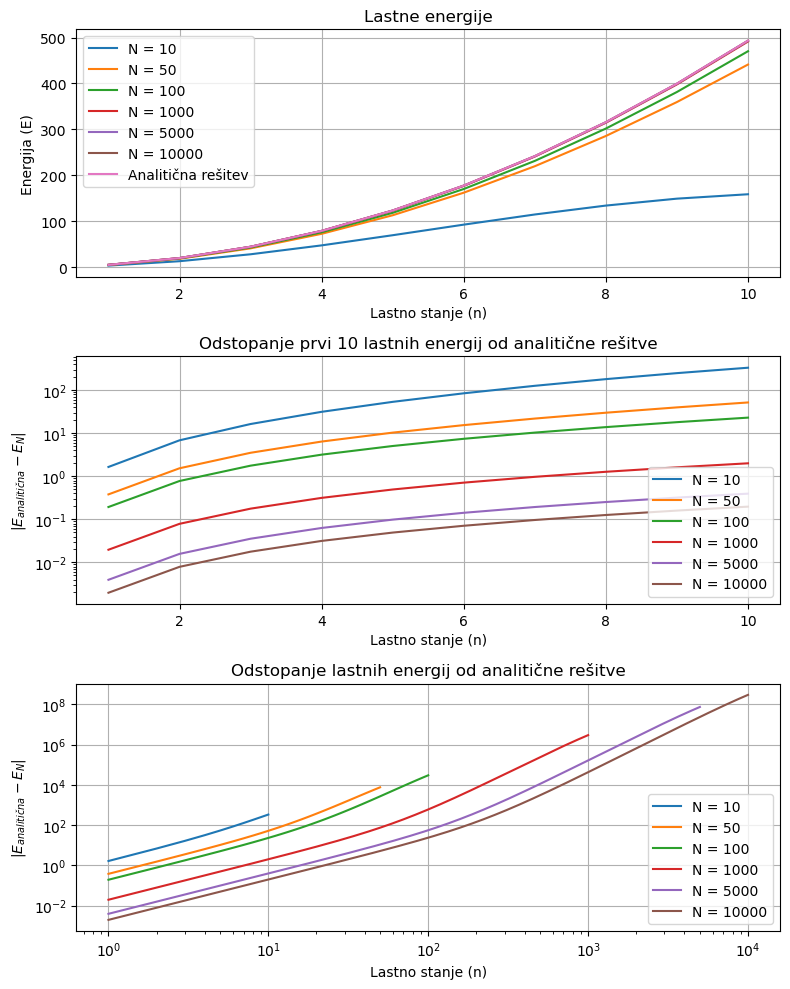

In [110]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
ns = [10,50,100,1000,5000,10000]
all_data = np.load("all_data_1.npy", allow_pickle=True)
for i,data in enumerate(all_data):
    h = data[2]
    t = data[1]
    k = -hbar**2 /(2*m*h**2) 
    eigval = data[0][0] * k 
    eigvec = data[0][1]
    sort_ind = np.argsort(eigval)
    # print(np.shape(eigval), np.shape(eigvec))
    eigval,eigvec = eigval[sort_ind], eigvec[sort_ind]
    # print(eigval[:10])
    diff= []
    for ind1,val in enumerate(eigval):
        Ea = hbar**2 * np.pi**2 * (ind1+1)**2 / (2*m*l**2)
        diff.append(np.abs(val-Ea))
    # plt.plot(eigval[:10],label=f'{i}')
    # plt.plot(t,eigvec.T[-1])
    # plt.plot(t,np.cos(np.pi*t / a)*np.max(np.abs(eigvec.T[-1])),label='anal')
    # plt.xlim(0,100)


    print(eigval[0])
    axs[0].plot(np.arange(1,len(eigval[:10])+1),eigval[:10], label=f'N = {ns[i]}')
    axs[2].plot(np.arange(1,len(diff)+1),diff, label=f'N = {ns[i]}')
    axs[2].set_yscale('log')
    axs[2].set_xscale('log')
    axs[2].legend()
    # axs[0].grid(color='gray')  # Set grid color explicitly

    axs[1].plot(np.arange(1,11),diff[:10], label=f'N = {ns[i]}')
    axs[1].set_yscale('log')
    # axs[1].set_xscale('log')
    axs[1].legend(loc='lower right')
    # axs[1].grid(color='gray')  # Set grid color explicitly  

Eas = [hbar**2 * np.pi**2 * (ind1+1)**2 / (2*m*l**2) for ind1 in range(10)]
axs[0].plot(np.arange(1,len(Eas[:10])+1),Eas[:10], label='Analitična rešitev')


axs[2].set_title('Odstopanje lastnih energij od analitične rešitve')
axs[2].set_xlabel('Lastno stanje (n)')
axs[2].set_ylabel(r'$|E_{analitična} - E_{N}|$')
axs[2].grid()
axs[2].legend(loc='lower right')

axs[0].set_title('Lastne energije')
axs[0].set_xlabel('Lastno stanje (n)')
axs[0].set_ylabel(r'Energija (E)')
axs[0].grid()
axs[0].legend(loc='upper left')

axs[1].set_title('Odstopanje prvi 10 lastnih energij od analitične rešitve')
axs[1].set_xlabel('Lastno stanje (n)')
axs[1].set_ylabel(r'$|E_{analitična} - E_{N}|$')
axs[1].grid()
axs[1].legend(loc='lower right')

plt.tight_layout()
plt.savefig("lastne_energije_neskoncna")


In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
#skalirano

fig, axs = plt.subplots(2, 3, figsize=(12, 6.5))
fig.suptitle('Matrike lastnih stanj za neskončno potencialno jamo')
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # Adjust the spacing between subplots

a = 1.


ns = [11,51,101,1001,5001,10001]
all_data = []
cmap = cm.get_cmap('pink')
for i, pos in enumerate([(0,0),(0,1),(0,2),(1,0), (1,1), (1,2)]):
    divider = make_axes_locatable(axs[pos])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    
    t = np.linspace(-a/2, a/2, ns[i])
    h = t[1] - t[0]
    diag = np.ones_like(t) * -2
    upper_diag = [1]*(len(t)-1)
    lower_diag = [1]*(len(t)-1)
    H = np.diag(diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)
    H = H * -hbar**2 / (h**2*2*m)
    res = la.eigh(H)


    # all_data = np.load("all_data_1.npy",allow_pickle=True)
    # res = all_data[i]


    data = res[1]
    print(res[0][0])
    im = axs[pos].imshow(data, cmap=cmap)
    # im = axs[pos].imshow(data, cmap=cmap, norm=LogNorm(vmin=10**(-10), clip=bool))
    axs[pos].set_title(r'N = ' + f'{ns[i]}')

    fig.colorbar(im, cax=cax, orientation='vertical')
    all_data.append([res,t,h])

plt.subplots_adjust(bottom=0.5)
plt.tight_layout()
plt.savefig("matrike_lastnih_stanj")
plt.show()
# np.save("all_data_2.npy", all_data)

In [ ]:
all_data = np.load("all_data_2.npy", allow_pickle=True)
for i,data in enumerate(all_data[::-1]):
    h = data[2]
    t = data[1]
    k = -hbar /(2*m*h**2) #=-hbar/(2m)
    eigval = data[0][0] 
    eigvec = data[0][1]
    sort_ind = np.argsort(eigval)
    print(np.shape(eigval), np.shape(eigvec))
    eigval,eigvec = eigval[sort_ind], eigvec[sort_ind]
    print(eigval[:10])
    # plt.plot(eigval[:10],label=f'{i}')
    plt.plot(t,eigvec.T[0])
    plt.plot(t,np.max(eigvec.T[0]) * np.cos(np.pi*t / a),label='anal',linestyle=':')
    # plt.xlim(0,100)
    print(eigvec[0])
    break
plt.legend()

In [3]:

def rku4( f, x0, t ):
    """Fourth-order Runge-Kutta method to solve x' = f(x,t) with x(t[0]) = x0.

    USAGE:
        x = rku4(f, x0, t)

    INPUT:
        f     - function of x and t equal to dx/dt.  x may be multivalued,
                in which case it should a list or a np array.  In this
                case f must return a np array with the same dimension
                as x.
        x0    - the initial condition(s).  Specifies the value of x when
                t = t[0].  Can be either a scalar or a list or np array
                if a system of equations is being solved.
        t     - list or np array of t values to compute solution at.
                t[0] is the the initial condition point, and the difference
                h=t[i+1]-t[i] determines the step size h.

    OUTPUT:
        x     - np array containing solution values corresponding to each
                entry in t array.  If a system is being solved, x will be
                an array of arrays.
    """

    n = len( t )
    x = np.array( [ x0 ] * n )
    for i in range( n - 1 ):
        # print(t[i+1], t[i])
        h = t[i+1] - t[i]
        k1 = h * f( x[i], t[i] )
        # print(f( x[i], t[i] ))
        # print(h)
        k2 = h * f( x[i] + 0.5 * k1, t[i] + 0.5 * h )
        k3 = h * f( x[i] + 0.5 * k2, t[i] + 0.5 * h )
        k4 = h * f( x[i] + k3, t[i+1] )
        # print( x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0)
        x[i+1] = x[i] + ( k1 + 2.0 * ( k2 + k3 ) + k4 ) / 6.0
    return x

4.934743474347435


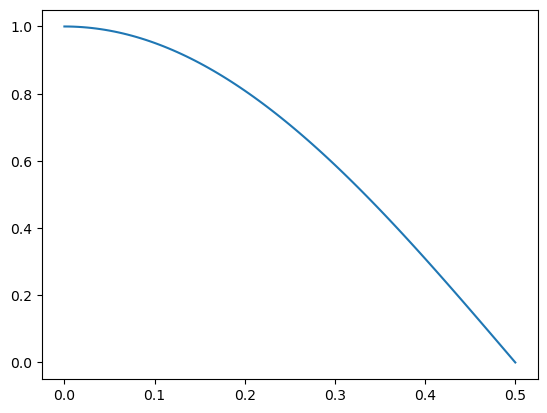

In [115]:
#strelska poskusno:

def shoot2(a, da, b, Es, t, tol):
    # from diffeq_2 import rku4
    

    def neskoncna(y,t):
        return np.array([y[1], -2* m * E / hbar**2 * y[0]])
    for E in Es:
        y = rku4(neskoncna, [a,da], t)
        # plt.plot(t,y.T[0])
        if abs(y.T[0][-1]-b) < tol:
            print(E)
            return y.T[0]


l = 1.
t = np.linspace(0, l/2, 101)
a = 0.
b = 0.
z1 = 1
z2 = 1.1
tol = 1e-5
Es = np.linspace(4.7,5,10000)
    
def neskoncna(y,t):
    return np.array([y[1], -2* m * E / hbar**2 * y[0]])

res = shoot2(1., 0., 0., Es, t, 1e-5)
# print(res)
plt.figure()
plt.plot(t,res)

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_86031/468685374.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


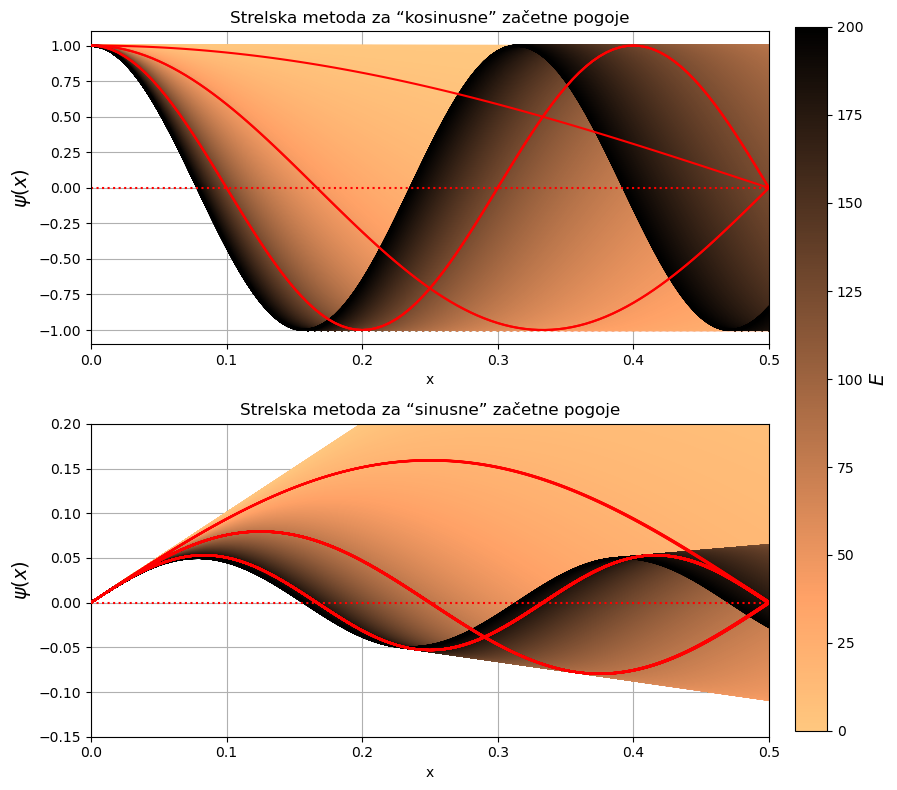

In [117]:

def neskoncna(y,t):
    return np.array([y[1], -2* m * E / hbar**2 * y[0]])


# font_params = {'family': 'serif', 'serif': ['Times New Roman'], 'size': 14}
# # font_params = {'family': 'cursive', 'cursive': ['Comic Sans MS'], 'size': 14}
# plt.rc('font', **font_params)
plt.rcdefaults()

m = 1.
hbar = 1.
l = 1.
t = np.linspace(0, l/2, 101)
a = 1.
b = 0.
da = 0.
tol = 1e-3
Es = np.linspace(0,200,10000)


fig, axs = plt.subplots(2, 1, figsize=(8, 8))
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")

for ind,E in enumerate(Es):

    y = rku4(neskoncna, [a,da], t)
    color = cmap1(norm1(E))

    if abs(y.T[0][-1]-b) < tol:
        # print(E)
        axs[0].plot(t, y.T[0], color='red',zorder=np.inf)
    axs[0].plot(t,y.T[0], color=color)


a = 0.
b = 0.
da = 1.
for ind,E in enumerate(Es):
    y = rku4(neskoncna, [a,da], t)
    color = cmap1(norm1(E))

    if abs(y.T[0][-1]-b) < tol:
        # print(E)
        axs[1].plot(t, y.T[0], color='red',zorder=np.inf)
    axs[1].plot(t,y.T[0], color=color)

axs[0].set_xlabel(r'x')
axs[0].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[0].set_title(r'Strelska metoda za “kosinusne” začetne pogoje')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'x')
axs[1].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[1].set_title(r'Strelska metoda za “sinusne” začetne pogoje')
axs[1].grid()
# axs[1].legend()
axs[0].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[1].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[0].set_xlim(0,0.5)
axs[1].set_xlim(0,0.5)
axs[1].set_ylim(-0.15,0.2)

cax = fig.add_axes([1, 0.08, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar1.set_label(r'$E$', fontsize=14)
plt.tight_layout()
plt.savefig('neskoncna_zvezno_strelska', bbox_inches="tight")

[  4.90049005  44.40444044 123.31233123 241.72417242 399.639964
 597.05970597 833.98339834]
[ 19.7019702   78.90789079 177.61776178 315.73157316 493.44934493
 710.57105711 967.19671967]


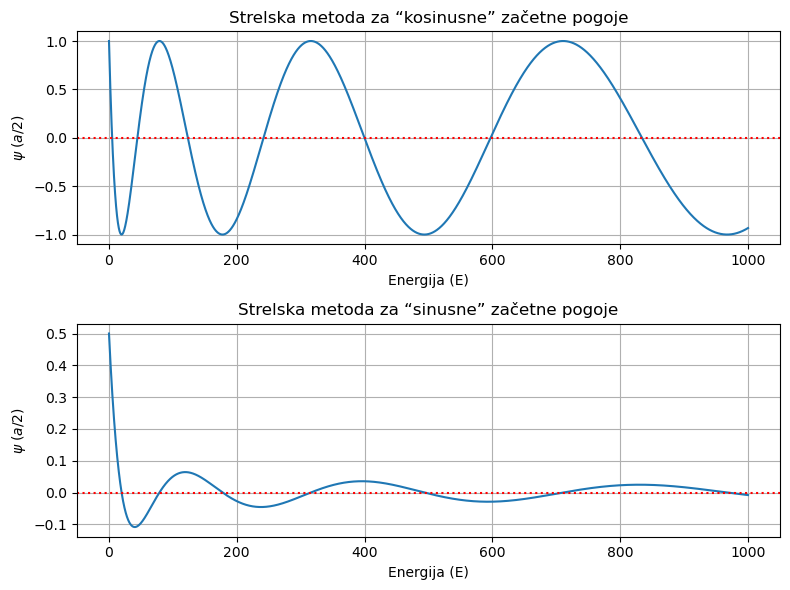

In [124]:

m = 1.
hbar = 1.
l = 1.
t = np.linspace(0, l/2, 101)
a = 1.
b = 0.
da = 0.
tol = 1e-3
Es = np.linspace(0,1000,10000)


fig, axs = plt.subplots(2, 1, figsize=(8,6))
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")

bs_s = []
for ind,E in enumerate(Es):

    y = rku4(neskoncna, [a,da], t)
    color = cmap1(norm1(E))
    bs_s.append(y.T[0][-1])
axs[0].plot(Es,bs_s)

a = 0.
b = 0.
da = 1.
bs_l = []
for ind,E in enumerate(Es):

    y = rku4(neskoncna, [a,da], t)
    color = cmap1(norm1(E))
    bs_l.append(y.T[0][-1])
axs[1].plot(Es,bs_l)


# print(np.where(np.diff(np.sign(bs_s)))[0])
# print(Es)

print(Es[np.where(np.diff(np.sign(bs_s)))[0]])
print(Es[np.where(np.diff(np.sign(bs_l)))[0]])
nicles_s = (Es[np.where(np.diff(np.sign(bs_s)))[0]])
niclel_s = (Es[np.where(np.diff(np.sign(bs_l)))[0]])

axs[0].set_xlabel(r'Energija (E)', fontsize=10)
axs[0].set_ylabel(r'$\psi$ $(a/2)$', fontsize=10)
axs[0].set_title(r'Strelska metoda za “kosinusne” začetne pogoje')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'Energija (E)', fontsize=10)
axs[1].set_ylabel(r'$\psi$ $(a/2)$', fontsize=10)
axs[1].set_title(r'Strelska metoda za “sinusne” začetne pogoje')
axs[1].grid()
axs[0].axhline(y=0, color='red', linestyle='dotted', label='y=0')
axs[1].axhline(y=0, color='red', linestyle='dotted', label='y=0')
plt.tight_layout()
plt.savefig("neskon_strelska_robni_pog_od_e")

In [ ]:
#odvisnost od koraka, od casa izvajanja

Končna jama


[12.4993011] [ 3.1773866  26.60561963]


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/4200580535.py:21: RuntimeWarning: divide by zero encountered in divide
  y = np.sqrt((u0/u)**2 - 1)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/4200580535.py:24: RuntimeWarning: divide by zero encountered in divide
  yl = -1/np.tan(u/2)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/4200580535.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.tan(u/2) - np.sqrt((u0/u)**2 - 1)
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/4200580535.py:8: RuntimeWarning: divide by zero encountered in divide
  return -1/np.tan(u/2) - np.sqrt((u0/u)**2 - 1)


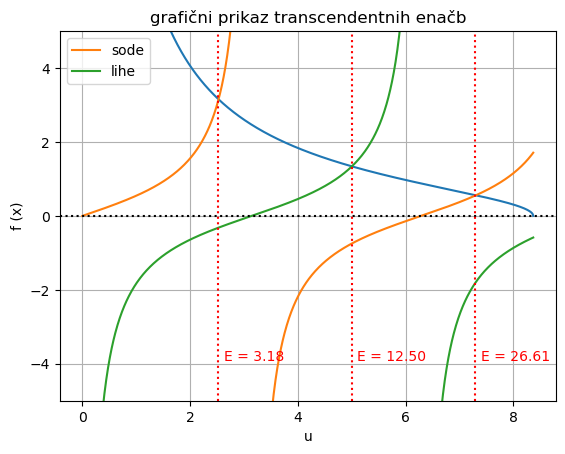

In [55]:
#koncna jama

def koncna_sode(u):
    u0 = np.sqrt(2*m*V0 * l**2 / hbar**2)
    return np.tan(u/2) - np.sqrt((u0/u)**2 - 1)
def koncna_lihe(u):
    u0 = np.sqrt(2*m*V0 * l**2 / hbar**2)
    return -1/np.tan(u/2) - np.sqrt((u0/u)**2 - 1)


n = 1.
m = 1.
hbar = 1.
l = 1.
V0 = 35.
u0 = np.sqrt(2*m*V0 * l**2 / hbar**2)



u = np.linspace(0, u0, 1000)
y = np.sqrt((u0/u)**2 - 1)

ys = np.tan(u/2)
yl = -1/np.tan(u/2)
ys[ys<-100] = np.nan
yl[yl<-100] = np.nan

plt.plot(u,y)
plt.plot(u,ys,label='sode')
plt.plot(u,yl,label='lihe')
plt.xlabel('u')
plt.ylabel('f (x)')
plt.ylim(-5,5)
plt.grid()
plt.legend()

# nicle:
ys = koncna_sode(u)
nicles = u[np.where( (np.diff(np.sign(ys))) > 0)]

yl = koncna_lihe(u)
niclel = u[np.where( (np.diff(np.sign(yl))) > 0)]

El = niclel**2 * hbar**2 / (2*m) 
Es = nicles**2 * hbar**2 / (2*m) 
print(El,Es)
plt.axhline(y=0, color='black', linestyle='dotted', label='Horizontal Line at y=0')
for nicla in niclel:
    plt.axvline(x=nicla, color='red', linestyle='dotted', label='Horizontal Line at y=0')
    plt.text(nicla + 0.1, -4, f'E = {nicla**2 * hbar**2 / (2 * m):.2f}', verticalalignment='bottom', color='red')

for nicla in nicles:
    plt.axvline(x=nicla, color='red', linestyle='dotted', label='Horizontal Line at y=0')
    plt.text(nicla + 0.1, -4, f'E = {nicla**2 * hbar**2 / (2 * m):.2f}', verticalalignment='bottom', color='red')

plt.title("grafični prikaz transcendentnih enačb")
plt.savefig("transc_en")

In [ ]:
#lahko dodas odvisnost energije od potenciala

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/1485759657.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


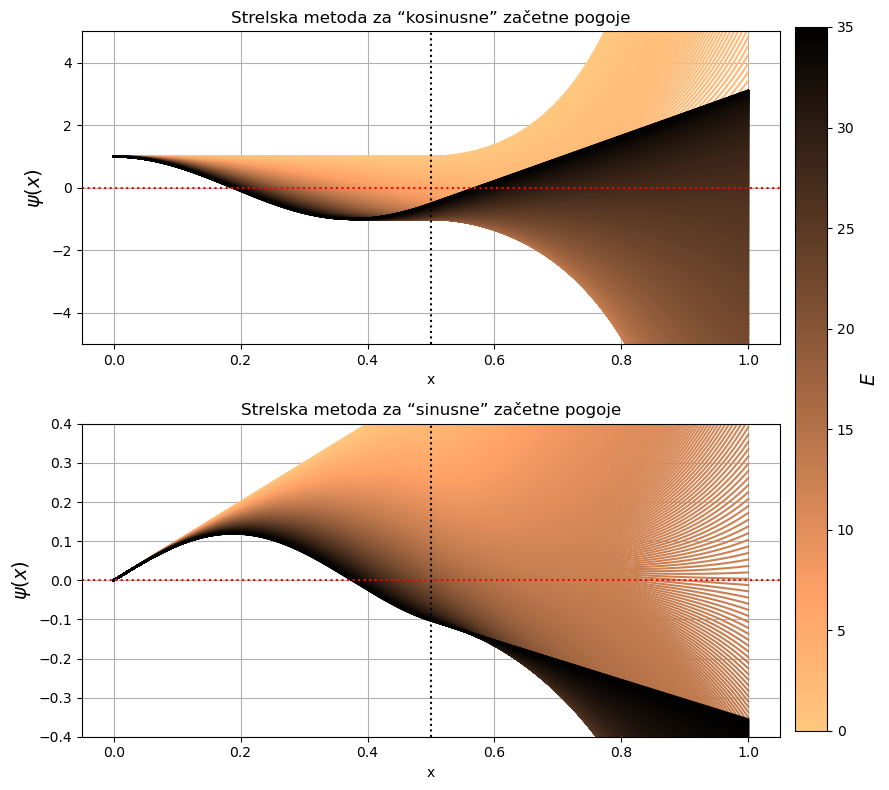

In [112]:
#strelska za koncno jamo

def koncna(y,t):
    if t <= l/2:
        res =np.array([y[1], -2* m * E / hbar**2 * y[0]])
    else:
        res =np.array([y[1], -2* m * (E-V0) / hbar**2 * y[0]])
    return res
    

m = 1.
hbar = 1.
l = 1.
t = np.linspace(0, 2*l/2, 10000)
a = 1.
b = 0.
da = 0.
tol = 1e-3
Es = np.linspace(0,35,1000)
V0 = 35

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")

for ind,E in enumerate(Es):

    y = rku4(koncna, [a,da], t)
    color = cmap1(norm1(E))

    # if abs(y.T[0][-1]-b) < tol:
    #     print(E)
    #     axs[0].plot(t, y.T[0], color='red',zorder=np.inf)
    axs[0].plot(t,y.T[0], color=color)


a = 0.
b = 0.
da = 1.
for ind,E in enumerate(Es):
    y = rku4(koncna, [a,da], t)
    color = cmap1(norm1(E))

    # if abs(y.T[0][-1]-b) < tol:
    #     print(E)
    #     axs[1].plot(t, y.T[0], color='red',zorder=np.inf)
    axs[1].plot(t,y.T[0], color=color)

axs[0].set_xlabel(r'x')
axs[0].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[0].set_title(r'Strelska metoda za “kosinusne” začetne pogoje')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'x')
axs[1].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[1].set_title(r'Strelska metoda za “sinusne” začetne pogoje')
axs[1].grid()
# axs[1].legend()
axs[0].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[1].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[0].axvline(x=0.5, color='black', linestyle='dotted', label='Rob jame')
axs[1].axvline(x=0.5, color='black', linestyle='dotted', label='Rob jame')
# axs[0].set_xlim(0,0.5)
# axs[1].set_xlim(0,0.5)
axs[1].set_ylim(-0.4,0.4)
axs[0].set_ylim(-5,5)

cax = fig.add_axes([1, 0.08, 0.04, 0.88])
cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs, label=r"$\lambda$",location='right')
cbar1.set_label(r'$E$', fontsize=14)
plt.tight_layout()
plt.savefig('koncna_strelska_1', bbox_inches="tight")

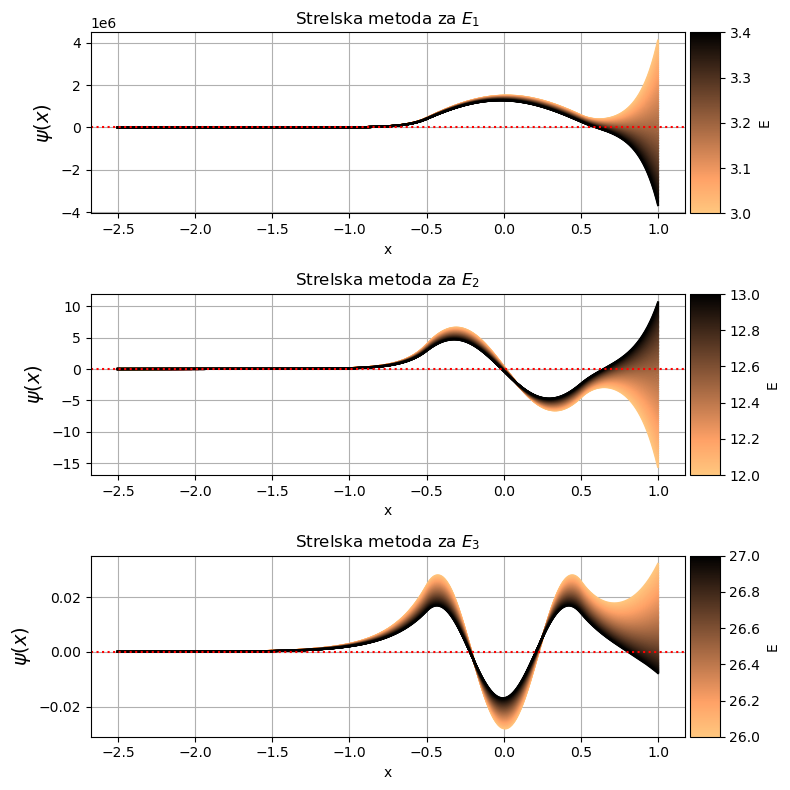

In [133]:
#strelska za koncno jamo
#najprej poisces lastne energije, tkoda gleda kje ne divergirajo, pol pa okol teh lastnih ničel plotas grafe, in gledas robne pogoje da dobis bolj natančno

def koncna(y,t):
    if np.abs(t) <= l/2:
        res =np.array([y[1], -2* m * E / hbar**2 * y[0]])
    else:
        res =np.array([y[1], -2* m * (E-V0) / hbar**2 * y[0]])
    return res
    

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-5*l/2, 2*l/2, 1000)
a = 1e-1
b = 0.
da = 0.

tol = 1e-3
Es = np.linspace(3,3.4,100)
V0 = 35

# Customize colorbar appearance
cbar.outline.set_linewidth(0.5)  # Adjust the thickness of the colorbar outline
cbar.ax.tick_params(axis='y', width=0.5)  # Adjust the thickness of the colorbar ticks
cbar.ax.yaxis.set_tick_params(width=0.5)  # Another way to adjust the thickness of the colorbar ticks


fig, axs = plt.subplots(3, 1, figsize=(8, 8))
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")
all_bs = []
for ind,E in enumerate(Es):

    y = rku4(koncna, [a,da], t)
    color = cmap1(norm1(E))
    # print(abs(y.T[0][np.argmin(np.abs(t))]-b))
    all_bs.append(y.T[0][-1])
    if abs(y.T[0][-1]-b) < tol:
        # print(E)
        # print(y.T[0])
        axs[0].plot(t, y.T[0], color='red',zorder=np.inf)
    # axs[0].plot(t[np.where(t<0.75)],y.T[0][np.where(t<0.75)], color=color)
    axs[0].plot(t,y.T[0], color=color)


divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap1, norm=norm1), cax=cax, orientation='vertical')
cbar.set_label(r'E', fontsize=10)


a = 1e-5
b = 0.
da = 0.
Es = np.linspace(12,13,100)
t = np.linspace(-5*l/2, 2*l/2, 1001)
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")
for ind,E in enumerate(Es):
    y = rku4(koncna, [a,da], t)
    color = cmap1(norm1(E))

    # if abs(y.T[0][-1]-b) < tol:
    #     # print(E)
    #     axs[1].plot(t, y.T[0], color='red',zorder=np.inf)
    axs[1].plot(t,y.T[0], color=color)

divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap1, norm=norm1), cax=cax, orientation='vertical')
cbar.set_label(r'E', fontsize=10)

a = 1e-5
b = 0.
da = 0.
Es = np.linspace(26,27,100)
t = np.linspace(-5*l/2, 2*l/2, 1001)
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")
for ind,E in enumerate(Es):
    y = rku4(koncna, [a,da], t)
    color = cmap1(norm1(E))
    axs[2].plot(t,y.T[0], color=color)

divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap1, norm=norm1), cax=cax, orientation='vertical')
cbar.set_label(r'E', fontsize=10)


axs[0].set_xlabel(r'x')
axs[0].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[0].set_title(r'Strelska metoda za $E_1$')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'x')
axs[1].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[1].set_title(r'Strelska metoda za $E_2$')
axs[1].grid()
# axs[1].legend()

axs[2].set_xlabel(r'x')
axs[2].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[2].set_title(r'Strelska metoda za $E_3$')
axs[2].grid()
# axs[1].legend()
axs[0].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[1].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[2].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')   

# axs[0].set_xlim(0,0.5)
# axs[1].set_xlim(0,0.5)
# axs[1].set_ylim(-0.15,0.2)
# axs[0].set_ylim(-5,5)

# cax = fig.add_axes([1, 0.08, 0.04, 0.88])
# cbar1 = fig.colorbar(cm.ScalarMappable(cmap=cmap1, norm=norm1),cax=cax, ax=axs, label=r"$\lambda$",location='right')
# cbar1.set_label(r'$E$', fontsize=14)
plt.tight_layout()
plt.savefig('koncna_strelska_2', bbox_inches="tight")

In [44]:
def koncna(y,t):
    if np.abs(t) <= l/2:
        res =np.array([y[1], -2* m * E / hbar**2 * y[0]])
    else:
        res =np.array([y[1], -2* m * (E-V0) / hbar**2 * y[0]])
    return res
    

In [57]:
#strelska za koncno jamo
#najprej poisces lastne energije, tkoda gleda kje ne divergirajo, pol pa okol teh lastnih ničel plotas grafe, in gledas robne pogoje da dobis bolj natančno

def koncna(y,t):
    if np.abs(t) <= l/2:
        res =np.array([y[1], -2* m * E / hbar**2 * y[0]])
    else:
        res =np.array([y[1], -2* m * (E-V0) / hbar**2 * y[0]])
    return res
    

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-5*l/2, 2*l/2, 10000)
a = 1e-1
b = 0.
da = 0.

tol = 1e-3
Es1 = np.linspace(2,35,100)
Es1 = np.linspace(3.1,3.2,10000)
V0 = 35

E_n = []
all_bs1 = []
all_diff1 = []
diff_1 = np.Inf
E_1 = 0
for ind,E in enumerate(Es1):

    y = rku4(koncna, [a,da], t)


    all_bs1.append(y.T[0][-1])
    b1 = y.T[0][np.argmin(np.abs(t+0.5))]
    b2 = y.T[0][np.argmin(np.abs(t-0.5))]
    all_diff1.append(np.abs(b1-b2))
    if np.abs(b1-b2) < diff_1:
        diff_1 = np.abs(b1-b2)
        E_1 = E

E_n.append(E_1)
print(E_1)

a = 1e-5
b = 0.
da = 0.
Es2 = np.linspace(12,13,10000)
t = np.linspace(-5*l/2, 2*l/2, 10000)
all_bs2 = []
all_diff2 = []
diff_1 = np.Inf
E_1 = 0
for ind,E in enumerate(Es2):

    y = rku4(koncna, [a,da], t)


    all_bs2.append(y.T[0][-1])
    b1 = y.T[0][np.argmin(np.abs(t+0.5))]
    b2 = y.T[0][np.argmin(np.abs(t-0.5))]
    all_diff2.append(np.abs(b1+b2))
    if np.abs(b1+b2) < diff_1:
        diff_1 = np.abs(b1+b2)
        E_1 = E

print(E_1)
E_n.append(E_1)

a = 1e-5
b = 0.
da = 0.
Es3 = np.linspace(26,27,10000)
t = np.linspace(-5*l/2, 2*l/2, 10000)
all_bs3 = []
all_diff3 = []
diff_1 = np.Inf
E_1 = 0
for ind,E in enumerate(Es3):

    y = rku4(koncna, [a,da], t)

    all_bs3.append(y.T[0][-1])
    b1 = y.T[0][np.argmin(np.abs(t+0.5))]
    b2 = y.T[0][np.argmin(np.abs(t-0.5))]
    all_diff3.append(np.abs(b1-b2))
    if np.abs(b1-b2) < diff_1:
        diff_1 = np.abs(b1-b2)
        E_1 = E

print(E_1)
E_n.append(E_1)



3.193909390939094
12.505050505050505
26.65916591659166


In [25]:
 

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-5*l/2, 2*l/2, 10000)
a = 1e-1
b = 0.
da = 0.

tol = 1e-3
Es1 = np.linspace(3.1,3.2,1000)
Es1 = np.linspace(2,100,1000)
V0 = 350


all_bs1 = []
all_diff1 = []
diff_1 = np.Inf
E_1 = 0
for ind,E in enumerate(Es1):

    y = rku4(koncna, [a,da], t)


    all_bs1.append(y.T[0][-1])
    b1 = y.T[0][np.argmin(np.abs(t+0.5))]
    b2 = y.T[0][np.argmin(np.abs(t-0.5))]
    all_diff1.append(np.abs(b1-b2))
    if np.abs(b1-b2) < diff_1:
        diff_1 = np.abs(b1-b2)
        E_1 = E

print(E_1)

78.9089089089089


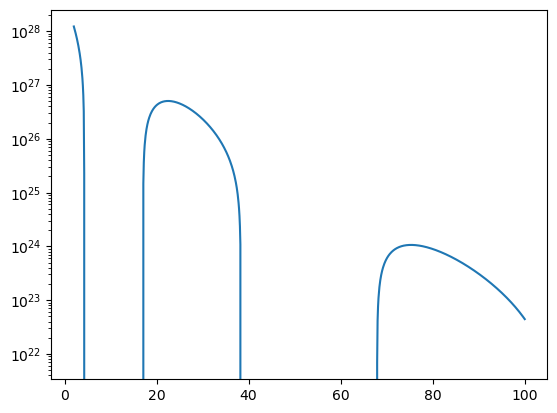

In [32]:
plt.plot(Es1,all_bs1)
plt.axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
# plt.ylim(-0.1e28,0.1e28)
plt.yscale('log')

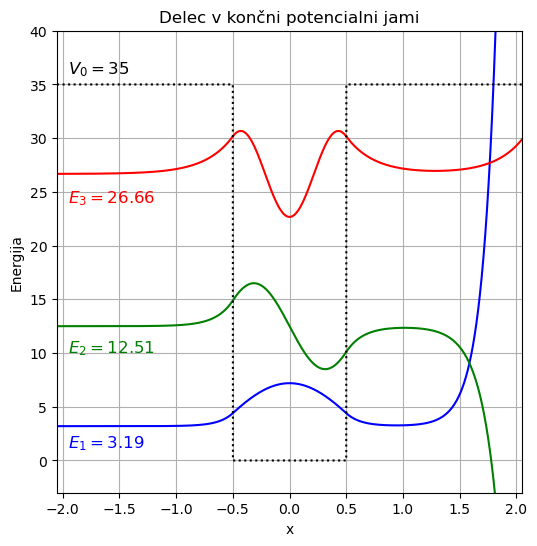

In [56]:

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-5*l/2, 5*l/2, 100000)
a = 1e-1
b = 0.
da = 0.

#3.193909390939094
# 12.505050505050505
# 26.65916591659166

tol = 1e-3
plt.figure(figsize=(6,6))
Es = np.linspace(3,3.8,1000)
# Es = np.linspace(3,3.8,1000)
E = 3.193909390939094
V0 = 35
# E = 3.193893893893894
y1 = rku4(koncna, [a,da], t)
E = 12.505050505050505

y2 = rku4(koncna, [a,da], t)
E = 26.65916591659166

y3 = rku4(koncna, [a,da], t)
color = 'black'
meja = 2.05

plt.plot(t[np.where(np.abs(t)<meja)], 3.195589558955896 + 4 * y1.T[0][np.where(np.abs(t)<meja)]/np.max(np.abs(y1.T[0][np.where(np.abs(t)<0.5)])), color='blue')
plt.plot(t[np.where(np.abs(t)<meja)], 12.5 + 4 * y2.T[0][np.where(np.abs(t)<meja)]/np.max(np.abs(y2.T[0][np.where(np.abs(t)<0.5)])), color='green')
plt.plot(t[np.where(np.abs(t)<meja)], 26.67067067067067 + 4 * y3.T[0][np.where(np.abs(t)<meja)]/np.max(np.abs(y3.T[0][np.where(np.abs(t)<0.5)])), color='red')
# plt.plot(t[np.where(np.abs(t)<1.55)],y.T[1][np.where(np.abs(t)<1.55)], color=color)
# plt.plot(t[np.where(np.abs(t)<1.55)],y.T[2][np.where(np.abs(t)<1.55)], color=color)
# plt.plot(t,y.T[0], color="black")
plt.ylim(-3,40)
V = np.ones_like(t) * 35
V[np.where(np.abs(t)<= 0.5)] = 0
plt.plot(t,V,linestyle=':',color='black')

plt.text(-meja + 0.1, 36, r'$V_0 = 35$', fontsize=12, color='black')  # Add V_0 label
plt.text(-meja + 0.1, 3.195589558955896 - 2, r'$E_1 = 3.19$', fontsize=12, color='blue')  # Add E_1 label
plt.text(-meja + 0.1, 12. - 2, r'$E_2 = 12.51$', fontsize=12, color='green')  # Add E_2 label
plt.text(-meja + 0.1, 26 - 2, r'$E_3 = 26.66$', fontsize=12, color='red')  # Add E_3 label

plt.xlabel('x')  
plt.ylabel('Energija')  
plt.title('Delec v končni potencialni jami')  

plt.grid(True) 
plt.xlim(-meja,meja)
plt.savefig('koncna_strelska_final')


In [81]:
plt.plot(Es,all_bs)
# print(np.diff(np.sign(all_bs)))
nicles = Es[np.where( np.abs(np.diff(np.sign(all_bs))) > 0)]
print(nicles)

NameError: name 'all_bs' is not defined

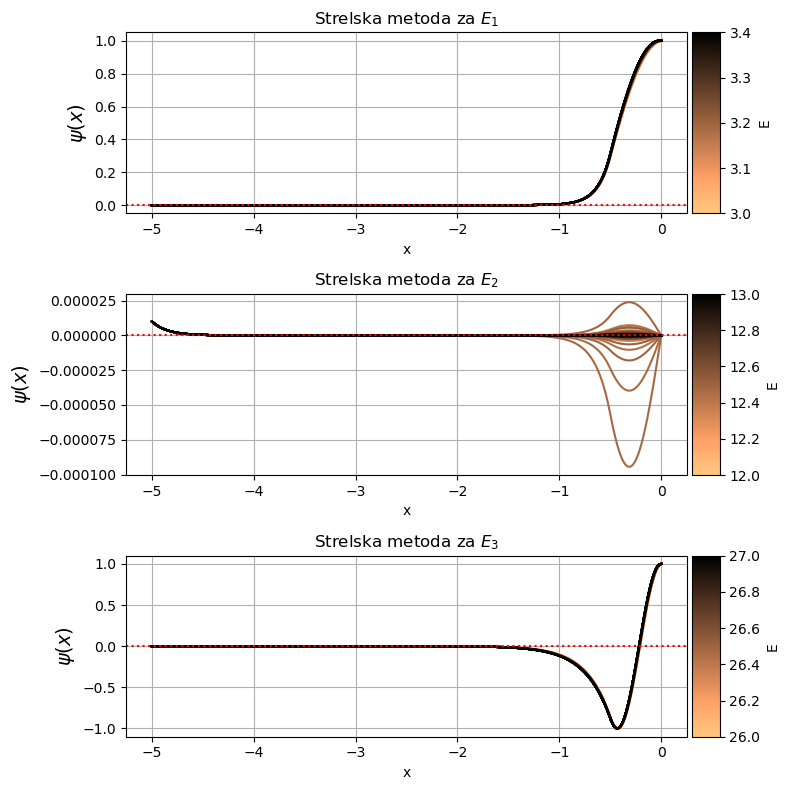

In [51]:
#strelska za koncno jamo
#najprej poisces lastne energije, tkoda gleda kje ne divergirajo, pol pa okol teh lastnih ničel plotas grafe, in gledas robne pogoje da dobis bolj natančno

def koncna(y,t):
    if np.abs(t) <= l/2:
        res =np.array([y[1], -2* m * E / hbar**2 * y[0]])
    else:
        res =np.array([y[1], -2* m * (E-V0) / hbar**2 * y[0]])
    return res
    

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-10*l/2, 0, 1001)
a = 0.
b = 1.
da = 1e-5
z1 = 1e-10
z2 = 1e-3

tol = 1e-3
Es = np.linspace(3,3.4,100)
V0 = 35

# Customize colorbar appearance
cbar.outline.set_linewidth(0.5)  # Adjust the thickness of the colorbar outline
cbar.ax.tick_params(axis='y', width=0.5)  # Adjust the thickness of the colorbar ticks
cbar.ax.yaxis.set_tick_params(width=0.5)  # Another way to adjust the thickness of the colorbar ticks


fig, axs = plt.subplots(3, 1, figsize=(8, 8))
norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")
all_bs = []
for ind,E in enumerate(Es):

    y = rku4(koncna, [a,da], t)
    y = shoot(koncna, a, b, z1, z2, t, tol)
    color = cmap1(norm1(E))

    all_bs.append(y)

    axs[0].plot(t,y, color=color)


divider = make_axes_locatable(axs[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap1, norm=norm1), cax=cax, orientation='vertical')
cbar.set_label(r'E', fontsize=10)

a = 1e-5
b = 0.
da = 0.
Es = np.linspace(12,13,100)
t = np.linspace(-10*l/2, 0, 1001)

norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")

all_bs = []
for ind,E in enumerate(Es):

    y = rku4(koncna, [a,da], t)
    y = shoot(koncna, a, b, z1, z2, t, tol)
    color = cmap1(norm1(E))

    all_bs.append(y)
    axs[1].plot(t,y, color=color)

divider = make_axes_locatable(axs[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap1, norm=norm1), cax=cax, orientation='vertical')
cbar.set_label(r'E', fontsize=10)

a = 1e-5
b = 1.
da = 0.
Es = np.linspace(26,27,100)
t = np.linspace(-10*l/2, 0, 1001)

norm1 = Normalize(vmin=min(Es), vmax=max(Es))
cmap1 = plt.get_cmap("copper_r")
all_bs = []

for ind,E in enumerate(Es):
    y = rku4(koncna, [a,da], t)
    y = shoot(koncna, a, b, z1, z2, t, tol)
    color = cmap1(norm1(E))

    all_bs.append(y)
    axs[2].plot(t,y, color=color)

divider = make_axes_locatable(axs[2])
cax = divider.append_axes('right', size='5%', pad=0.05)
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap1, norm=norm1), cax=cax, orientation='vertical')
cbar.set_label(r'E', fontsize=10)


axs[0].set_xlabel(r'x')
axs[0].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[0].set_title(r'Strelska metoda za $E_1$')
axs[0].grid()
# axs[0].legend()

axs[1].set_xlabel(r'x')
axs[1].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[1].set_title(r'Strelska metoda za $E_2$')
axs[1].grid()
# axs[1].legend()

axs[2].set_xlabel(r'x')
axs[2].set_ylabel(r'$\psi(x)$', fontsize=14)
axs[2].set_title(r'Strelska metoda za $E_3$')
axs[2].grid()
# axs[1].legend()
axs[0].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[1].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')
axs[2].axhline(y=0, color='red', linestyle='dotted', label='Horizontal Line at y=0')   

# axs[0].set_xlim(0,0.5)
# axs[1].set_xlim(0,0.5)
# axs[1].set_ylim(-0.15,0.2)
# axs[0].set_ylim(-5,5)

plt.tight_layout()
plt.savefig("strel_v_izhodisce")

In [98]:
#diferencna metoda:

m = 1.
hbar = 1.
l = 1.
t = np.linspace(-3*l/2, 3*l/2, 1000)
h = t[1]-t[0]
k = 2*m*l**2/hbar**2

V0 = 35

In [99]:
#diferencna za koncno jamo:

diag = np.ones_like(t) * -2 / (h**2) 
diag[np.where(np.abs(t) >= l/2)] = diag[np.where(np.abs(t) >= l/2)] - V0*k
upper_diag = [1]*(len(t)-1) / (h**2)
lower_diag = [1]*(len(t)-1) / (h**2)
H = np.diag(diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1)
# H = H * -hbar**2 / (2*m)
# print(H)

res= la.eigh(H)
res = scipy.linalg.eigh_tridiagonal(diag, upper_diag, select='v', select_range=(-np.inf, np.inf))  #za simetrično tridiagonalno matriko
print(np.array(res[0][::-1][:5]) /-k)
eigval = (np.array(res[0][::-1]) /-k)

[ 3.21005709 12.56584259 26.77424662 38.08750276 40.17187657]


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/3358574814.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('pink')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/3358574814.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


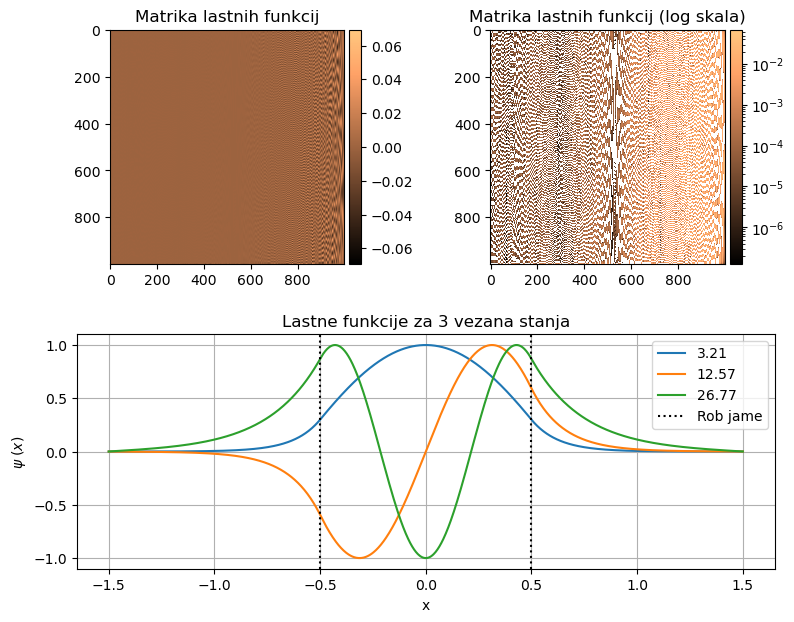

In [100]:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable


# Assuming res, t, and eigval are defined

# Create a 2x2 grid for the subplots
fig = plt.figure(figsize=(9, 7))
gs = GridSpec(2, 2, height_ratios=[3, 3], hspace=0.3)

# Subplot in the first column of the first row
norm = matplotlib.colors.LogNorm()
axs0 = fig.add_subplot(gs[0, 1])
cmap = plt.cm.get_cmap('pink')
im = axs0.imshow(res[1], cmap='copper', norm=norm)
axs0.set_title('Matrika lastnih funkcij (log skala)')  # Set the title if needed
divider = make_axes_locatable(axs0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

# Subplot in the second column of the first row
axs1 = fig.add_subplot(gs[0, 0])
# Add your code for the second subplot in the top row (axs1)
im = axs1.imshow(res[1],cmap='copper')
axs1.set_title('Matrika lastnih funkcij')  # Set the title if needed
divider = make_axes_locatable(axs1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

# Subplot in the second row spanning both columns
axs2 = fig.add_subplot(gs[1, :])
for i in range(3):
    axs2.plot(t, res[1].T[-(i+1)]/np.max(np.abs(res[1].T[-(i+1)])), label=f'{eigval[i]:.2f}')

axs2.axvline(x=-0.5, color='black', linestyle='dotted', label='Rob jame')
axs2.legend()
axs2.axvline(x=0.5, color='black', linestyle='dotted', label='Rob jame')
axs2.set_title('Lastne funkcije za 3 vezana stanja')  # Set the title if needed
axs2.set_xlabel('x')  # Set the title if needed
axs2.set_ylabel(r'$\psi$ $(x)$')  # Set the title if needed

axs2.grid()
plt.tight_layout()
plt.savefig('diferencna_koncna')

[ -5.50449601 -20.80597894 -38.16324786 -43.83874544 -50.52909473]


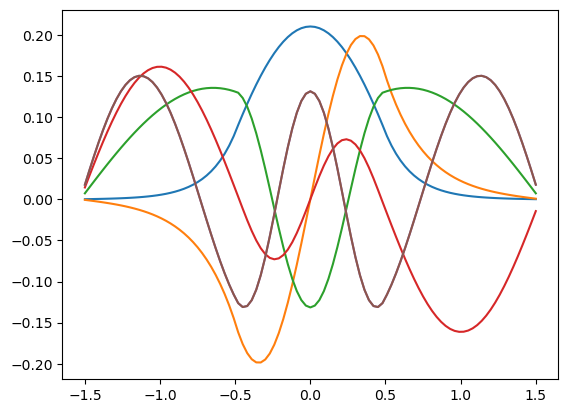

In [61]:
plt.plot(t, res[1].T[-1])
plt.plot(t, res[1].T[-2])
plt.plot(t, res[1].T[-3])
plt.plot(t, res[1].T[-4])
plt.plot(t, res[1].T[-5])
plt.plot(t, res[1].T[-5])
print(res[0][::-1][:5])

In [78]:
#dodatna


m = 1.
hbar = 1.
l = 1.
t = np.linspace(-l/2, l/2, 1000)
h = t[1]-t[0]
k = h**4

V0 = 35

diag = np.ones_like(t) * 6 
# diag[np.where(np.abs(t) >= l/2)] = diag[np.where(np.abs(t) >= l/2)] - V0*k
upper_diag = [-4]*(len(t)-1) 
lower_diag = [-4]*(len(t)-1)
upper2_diag = [1]*(len(t)-2)
lower2_diag = [1]*(len(t)-2)

H = np.diag(diag) + np.diag(upper_diag, k=1) + np.diag(lower_diag, k=-1) + np.diag(upper2_diag, k=2) + np.diag(lower2_diag, k=-2)
print(H)

res= la.eigh(H)
print((np.array(res[0][:5]) /k)**(1/4))
eigval = (np.array(res[0][::-1]) /k)
res = res[0]/k, res[1]



[[ 6. -4.  1. ...  0.  0.  0.]
 [-4.  6. -4. ...  0.  0.  0.]
 [ 1. -4.  6. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  6. -4.  1.]
 [ 0.  0.  0. ... -4.  6. -4.]
 [ 0.  0.  0. ...  1. -4.  6.]]
[ 4.71587815  7.82968671 10.962662   14.09477135 17.22688747]


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/3332687345.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('pink')
/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_42788/3332687345.py:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


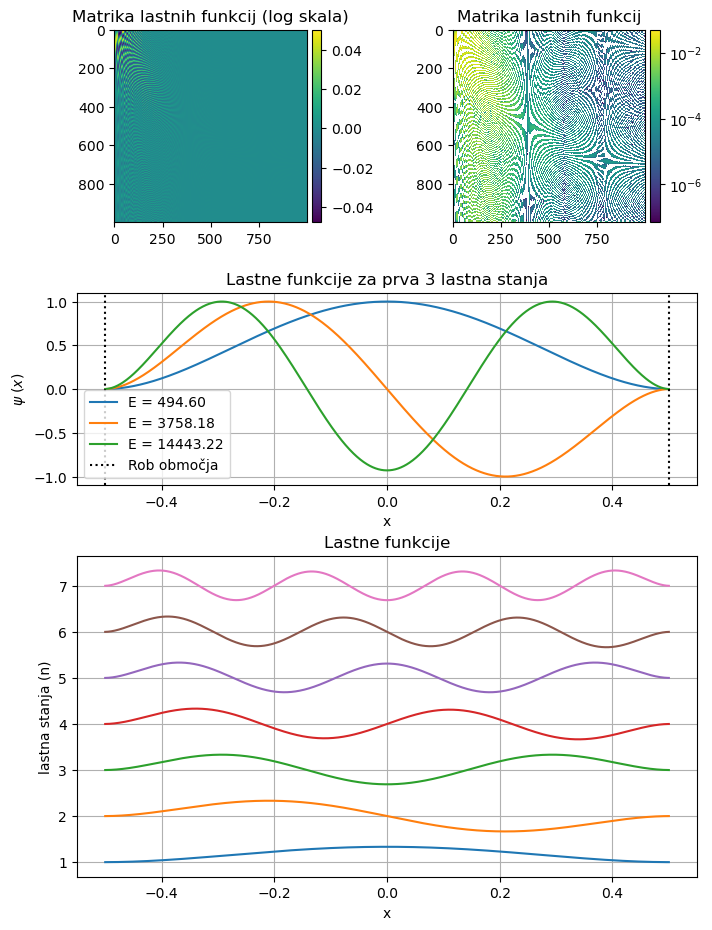

In [97]:

from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(8, 11))
gs = GridSpec(3, 2, height_ratios=[3, 3, 5], hspace=0.3)


norm = matplotlib.colors.LogNorm()
axs0 = fig.add_subplot(gs[0, 1])
cmap = plt.cm.get_cmap('pink')
im = axs0.imshow(res[1], cmap='viridis', norm=norm)
axs0.set_title('Matrika lastnih funkcij')  
divider = make_axes_locatable(axs0)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')


axs1 = fig.add_subplot(gs[0, 0])

im = axs1.imshow(res[1],cmap='viridis')
axs1.set_title('Matrika lastnih funkcij (log skala)') 
divider = make_axes_locatable(axs1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')

axs2 = fig.add_subplot(gs[1, :])
for i in range(3):
    axs2.plot(t, res[1].T[(i)]/np.max(np.abs(res[1].T[i])), label=f'E = {res[0][i]:.2f}')

axs2.axvline(x=-0.5, color='black', linestyle='dotted', label='Rob območja')
axs2.legend()
axs2.axvline(x=0.5, color='black', linestyle='dotted', label='Rob jame')
axs2.set_title('Lastne funkcije za prva 3 lastna stanja')  
axs2.set_xlabel('x')  
axs2.set_ylabel(r'$\psi$ $(x)$')  

axs2.grid()

axs3 = fig.add_subplot(gs[2, :])
for i in range(7):
    axs3.plot(t, i*3 + res[1].T[(i)]/np.max(np.abs(res[1].T[i])), label=f'{res[0][i]:.2f}')
axs3.set_title('Lastne funkcije')  
axs3.set_xlabel('x')  
axs3.set_ylabel('lastna stanja (n)') 
axs3.set_yticks(np.arange(0, 7) * 3)  
axs3.set_yticklabels(np.arange(1, 8))  
axs3.grid()

plt.tight_layout()
plt.savefig('dodatna_koncna')
